In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 150)

In [158]:
df = pd.read_csv("books.csv", encoding="utf-8")

# DATA CLEANING

In [159]:
df.shape

(11127, 13)

In [160]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,err
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78E+12,eng,870,2153167,29221,09-01-04,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78E+12,eng,352,6333,244,11-01-03,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78E+12,eng,435,2339585,36325,05-01-04,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [161]:
# Checking the datatypes
df.dtypes

bookID                 int64
title                 object
authors               object
average_rating        object
isbn                  object
isbn13                object
language_code         object
  num_pages           object
ratings_count          int64
text_reviews_count     int64
publication_date      object
publisher             object
err                   object
dtype: object

In [162]:
# Get the non-NA values in column "err"
non_na_values = df["err"].notna()
# Filter the DataFrame to get only the rows with non-NA values in column "err"
df_non_na = df[non_na_values]
df_non_na

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,err
3348,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,Jr./Sam B. Warner,3.58,674842111,9.78E+12,en-US,236,61,6,4/20/2004,Harvard University Press
4702,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien w...,3.58,1593600119,9.78E+12,eng,400,26,4,04-06-04,Cold Spring Press
5877,22128,Patriots (The Coming Collapse),James Wesley,Rawles,3.63,156384155X,9.78E+12,eng,342,38,4,1/15/1999,Huntington House Publishers
8979,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,Son & Ferguson,0,851742718,9.78E+12,eng,49,0,0,05-01-77,Brown Son & Ferguson Ltd.


In [163]:
# Making a list of indexes to drop the rows.
indexes_of_rows_to_drop = list(df_non_na.index)
indexes_of_rows_to_drop
# Dropping these rows
df = df.drop(index=[3348, 4702, 5877, 8979])

In [164]:
# Get the non-NA values in column "err"
non_na_values = df["err"].notna()
# Filter the DataFrame to get only the rows with non-NA values in column "err"
df_non_na = df[non_na_values]
# Checking "err" column again to see if there are any other values than NaN.
df["err"].isna().value_counts()
# Dropping "err" column because it is an artificial column I just created to import the dataframe.
df.drop(["err"], axis = 1, inplace = True)

In [165]:
# "isbn" column is just another unique number to identify the book, the International Standard Book Number.
# "isbn13" column is same but with 13 digits.
# I don't need other identification numbers for the books dataset so I drop these two columns.
df.drop(["isbn","isbn13"], axis = 1, inplace = True)

In [166]:
# Seems like num_pages has some spaces in the column names. Lets strip all column names so we have no whitespaces before and after.
df.columns = df.columns.str.strip()
# Now able to change the datatype of "average_rating" to float.
df["average_rating"] = df["average_rating"].astype(np.float64)
# Changing the Number of Pages column "num_pages" to int.
df["num_pages"] = df["num_pages"].astype(np.int64)

In [167]:
display(df.head(5))
df.dtypes

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,09-01-04,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11-01-03,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,05-01-04,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic


bookID                  int64
title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [168]:
# Lets check if all publication dates are in DD/MM/YYYY format to fix all of them.
df["publication_date"].tail(15)
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
# Checking NaT (Not a Time) rows to fix.
invalid_rows = df['publication_date'].isna()
print(df.loc[invalid_rows, 'publication_date'])
# Fixing manually two cells where the publication_date is corrupted.
df.loc[8180, 'publication_date'] = pd.to_datetime('1999-01-01')
df.loc[11098, 'publication_date'] = pd.to_datetime('1975-01-01')

8180    NaT
11098   NaT
Name: publication_date, dtype: datetime64[ns]


In [169]:
# All datatypes are fixed now.
display(df.dtypes)
df.head()

bookID                         int64
title                         object
authors                       object
average_rating               float64
language_code                 object
num_pages                      int64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                     object
dtype: object

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,2003-11-01,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,2004-09-13,Scholastic


In [170]:
# Checking for missing values in the dataframe.
df.isna().sum()
# No missing values are found.

bookID                0
title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [171]:
df['language_code'].unique()
df['language_code'].value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

In [172]:
# Fixing the Language Codes and unifying them. Changing language codes to language names.
# Dictionary that consists Language codes to Language names.
lang_dict = {
    'eng': 'English',
    'en-US': 'English',
    'en-GB': 'English',
    'en-CA': 'English',
    'enm': 'Middle English',
    'fre': 'French',
    'ger': 'German',
    'spa': 'Spanish',
    'jpn': 'Japanese',
    'por': 'Portuguese',
    'lat': 'Latin',
    'grc': 'Ancient Greek',
    'ita': 'Italian',
    'zho': 'Chinese',
    'rus': 'Russian',
    'swe': 'Swedish',
    'msa': 'Malay',
    'nl': 'Dutch',
    'glg': 'Galician',
    'srp': 'Serbian',
    'tur': 'Turkish',
    'gla': 'Scottish Gaelic',
    'wel': 'Welsh',
    'ara': 'Arabic',
    'nor': 'Norwegian',
    'ale': 'Aleut',
    'mul': 'Multiple Languages'
}



# Replacing language codes with language names.
df['language_name'] = df['language_code'].replace(lang_dict)

# Dropping language code column.
df.drop(["language_code"], axis=1, inplace=True)

#df['language_name'].value_counts()

In [173]:
# Checking if there are any duplicate rows.
df.duplicated().sum()

0

In [174]:
# Data validation on "publication_date"
# 91 publication dates has to be fixed, actually the dates are almost correct put the century has to be 20th century instead of the 21th century.
df[df["publication_date"] > "2021-01-01"]
# Subtract 100 years from dates greater than 2021-01-01 because they are supposed to be in 20th century.
df.loc[df['publication_date'] > '2021-01-01', 'publication_date'] -= pd.DateOffset(years=100)

In [175]:
def splitting_string(text):
    first_author = text.split('/')
    return first_author[0]

df['author'] = df['authors'].apply(lambda x : splitting_string(x))
df.drop(["authors"], axis = 1, inplace = True)

In [176]:
# Fixing Author names

#  df["author"]

# df['author'] = df['author'].apply(lambda x: x.encode('iso-8859-1').decode('utf-8'))

In [177]:
import pickle
# Loading pickle file into dictionary.
with open('final_genres_dictionary.pkl', 'rb') as handle:
    final_genres_dictionary = pickle.load(handle)
    print('dictionary loaded successfully to variable')

dictionary loaded successfully to variable


In [178]:
# Convert the 'bookID' column to strings and apply the mapping
df['genre'] = df['bookID'].astype(str).map(final_genres_dictionary)
# Now I have genres of all the books, and for the missing ones it is labeled as blank.

In [179]:
# df_pub means DataFrame publishers, I will try to fix the publishers on this variable.
df_pub = df

In [180]:
from fuzzywuzzy import process
from fuzzywuzzy import fuzz
import warnings
warnings.filterwarnings('ignore')

# Get the unique publishers
publishers = df_pub['publisher'].unique()

matches = pd.DataFrame(columns=['source', 'target', 'score'])

for i, source in enumerate(publishers):
    targets = [p for j, p in enumerate(publishers) if j != i]
    results = process.extract(source, targets, scorer=fuzz.token_sort_ratio)
    matches = matches.append(pd.DataFrame({'source': source, 'target': [r[0] for r in results], 'score': [r[1] for r in results]}))

matches_filtered = matches[matches['score'] < 100]
matches_sorted = matches_filtered.sort_values(by='score', ascending=False)
matches_sorted.head(20)

,source,target,score
0,HarperCollins Publishers,HarperCollinsPublishers,98
0,Editions de l'Olivier,Éditions de L'Olivier,98
0,St. Martin's Paperback,St. Martin's Paperbacks,98
0,Penguin Classics Deluxe Edition,Penguin Classics Deluxe Editions,98
0,Penguin Book Limited,Penguin Books Limited,98
0,Plaza & Janes Editores S.A.,Plaza & Janés Editores S.A.,98
0,Penguin Books Limited,Penguin Book Limited,98
0,Dover Publications (NY),Dover Publications (NYC),98
0,Bloomsbury Children's Books,Bloomsbury Childrens Books,98
0,W.W. Norton & Company (NY),W.W. Norton & Company (NYC),98


In [181]:
# Fixing publisher names

df_pub.loc[df_pub["publisher"].str.contains("Penguin"), "publisher"] = "Penguin Books"
df_pub.loc[df_pub["publisher"].str.contains("Scholastic"), "publisher"] = "Scholastic"
df_pub.loc[df_pub["publisher"].str.contains("Harper"), "publisher"] = "HarperCollins"
df_pub.loc[df_pub["publisher"].str.contains("Orion Publishing"), "publisher"] = "Orion Publishing Group"
df_pub.loc[df_pub["publisher"].str.contains("Princeton University Press"), "publisher"] = "Princeton University Press"
df_pub.loc[df_pub["publisher"].str.contains("Book Publishing Co"), "publisher"] = "Book Publishing Company"
df_pub.loc[df_pub["publisher"].str.contains("Vintage"), "publisher"] = "Vintage Books"
df_pub.loc[df_pub["publisher"].str.contains("Random House"), "publisher"] = "Random House"
df_pub.loc[df_pub["publisher"].str.contains("Puffin"), "publisher"] = "Puffin Books"
df_pub.loc[df_pub["publisher"].str.contains("Mariner"), "publisher"] = "Mariner Books"
df_pub.loc[df_pub["publisher"].str.contains("Ballantine"), "publisher"] = "Ballantine Books"
df_pub.loc[df_pub["publisher"].str.contains("Simon & Schuster"), "publisher"] = "Simon & Schuster"
df_pub.loc[df_pub["publisher"].str.contains("Pocket Star"), "publisher"] = "PPP Star Books"
df_pub.loc[df_pub["publisher"].str.contains("Pocket"), "publisher"] = "Pocket Books"
df_pub.loc[df_pub["publisher"].str.contains("PPP Star Books"), "publisher"] = "Pocket Star Books"
df_pub.loc[df_pub["publisher"].str.contains("Bantam"), "publisher"] = "Bantam Books"
df_pub.loc[df_pub["publisher"].str.contains("VIZ"), "publisher"] = "VIZ Media"
df_pub.loc[df_pub["publisher"].str.contains("Bantam"), "publisher"] = "Bantam Books"
df_pub.loc[df_pub["publisher"].str.contains("Underwood/Miller"), "publisher"] = "Underwood/Miller"
df_pub.loc[df_pub["publisher"].str.contains("Berkley"), "publisher"] = "Berkley"
df_pub.loc[df_pub["publisher"].str.contains("Dover"), "publisher"] = "Dover Publications"
df_pub.loc[df_pub["publisher"].str.contains("Collins Modern Classics"), "publisher"] = "HarperCollins"
df_pub.loc[df_pub["publisher"].str.contains("Modern Lib"), "publisher"] = "Modern Library"
df_pub.loc[df_pub["publisher"].str.contains("Del Rey"), "publisher"] = "Del Rey"
df_pub.loc[df_pub["publisher"].str.contains("Tor "), "publisher"] = "Tor Books"
df_pub.loc[df_pub["publisher"].str.contains("Grand Central"), "publisher"] = "Grand Central Publishing"
df_pub.loc[df_pub["publisher"].str.contains("Oxford"), "publisher"] = "Oxford University"
df_pub.loc[df_pub["publisher"].str.contains("W.W. Norton"), "publisher"] = "W.W. Norton & Company"
df_pub.loc[df_pub["publisher"].str.contains("Cambridge"), "publisher"] = "Cambridge University Press"
df_pub.loc[df_pub["publisher"].str.contains("Signet"), "publisher"] = "Signet"
df_pub.loc[df_pub["publisher"].str.contains("Simon Publications"), "publisher"] = "SavingSim"
df_pub.loc[df_pub["publisher"].str.contains("Simon"), "publisher"] = "Simon & Schuster"
df_pub.loc[df_pub["publisher"].str.contains("SavingSim"), "publisher"] = "Simon Publications"
df_pub.loc[df_pub["publisher"].str.contains("Anchor"), "publisher"] = "Anchor"
df_pub.loc[df_pub["publisher"].str.contains("William Morr"), "publisher"] = "William Morrow"
df_pub.loc[df_pub["publisher"].str.contains("Avon"), "publisher"] = "Avon"
df_pub.loc[df_pub["publisher"].str.contains("Library of Ame"), "publisher"] = "Library of America"
df_pub.loc[df_pub["publisher"].str.contains("Broadway"), "publisher"] = "Broadway"
df_pub.loc[df_pub["publisher"].str.contains("St. Martin"), "publisher"] = "St. Martin's Press"
df_pub.loc[df_pub["publisher"].str.contains("Basic B"), "publisher"] = "Basic Books"
df_pub.loc[df_pub["publisher"].str.contains("Vertigo"), "publisher"] = "Vertigo"
df_pub.loc[df_pub["publisher"].str.contains("Farrar"), "publisher"] = "Farrar  Straus and Giroux"
df_pub.loc[df_pub["publisher"].str.contains("DAW"), "publisher"] = "DAW"
df_pub.loc[df_pub["publisher"].str.contains("Picador"), "publisher"] = "Picador"
df_pub.loc[df_pub["publisher"].str.contains("G.P"), "publisher"] = "G.P. Putnam's Sons"
df_pub.loc[df_pub["publisher"].str.contains("Back Bay"), "publisher"] = "Back Bay Books"

In [182]:
# Filtering by string and checking publisher names.
filtered_df = df_pub[df_pub['publisher'].str.contains("Back Bay")]
filtered_df
filtered_df["publisher"].value_counts()

Back Bay Books    41
Name: publisher, dtype: int64

In [183]:
# Changing language_name column name to language.
df_pub = df_pub.rename({'language_name': 'language'}, axis=1)

In [184]:
# Assigning df_pub to df, to continue with naming df.
df=df_pub

### SQL Alchemy to export the dataframe to mysql.

In [185]:
import pymysql.cursors
from sqlalchemy import create_engine
from sqlalchemy import text

In [186]:
import getpass

# sql_pass = getpass.getpass()

In [187]:
# connection_string = 'mysql+pymysql://root:' + sql_pass + '@localhost:3306/'
# engine = create_engine(connection_string)

In [188]:
# df.to_sql('staging_books', engine, 'books_project', if_exists='replace', index=False) #, dtype={'timestamp':'DateTime()', 'type':'VARCHAR(10)', 'sub_type':'VARCHAR(50)'}

11123

# EDA (Explanatory Data Analysis)

In [189]:
# df
df.head(10)

,bookID,title,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,publisher,language,author,genre
0,1,Harry Potter and the Half-Blood Prince (Harry ...,4.57,652,2095690,27591,2006-09-16,Scholastic,English,J.K. Rowling,Fantasy
1,2,Harry Potter and the Order of the Phoenix (Har...,4.49,870,2153167,29221,2004-09-01,Scholastic,English,J.K. Rowling,Fantasy
2,4,Harry Potter and the Chamber of Secrets (Harry...,4.42,352,6333,244,2003-11-01,Scholastic,English,J.K. Rowling,Fantasy
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,435,2339585,36325,2004-05-01,Scholastic,English,J.K. Rowling,Fantasy
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,2690,41428,164,2004-09-13,Scholastic,English,J.K. Rowling,Fantasy
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",3.74,152,19,1,2005-04-26,Nimble Books,English,W. Frederick Zimmerman,blank
6,10,Harry Potter Collection (Harry Potter #1-6),4.73,3342,28242,808,2005-09-12,Scholastic,English,J.K. Rowling,Fantasy
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,4.38,815,3628,254,2005-11-01,Gramercy Books,English,Douglas Adams,Science Fiction
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,4.38,815,249558,4080,2002-04-30,Del Rey,English,Douglas Adams,Science Fiction
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,4.22,215,4930,460,2004-08-03,Crown,English,Douglas Adams,Science Fiction


### Book count per author

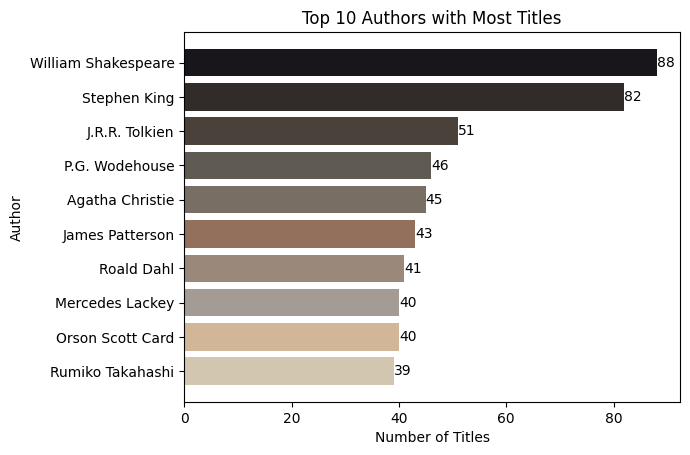

In [203]:
# group by author and count titles
top_authors = df.groupby('author')['title'].count().nlargest(10)[::-1]

colors = ['#18161a', '#312b29', '#4a413b', '#5f5b52', '#796e64', '#92705b', '#9a897b', '#a49c94', '#d1b797', '#d2c6b0'][::-1]

plt.title('Top 10 Authors with Most Titles')
plt.bar_label(plt.barh(top_authors.index, top_authors.values), 
              labels=top_authors.values, 
              label_type='edge')
plt.barh(top_authors.index, top_authors.values, color=colors)
plt.xlabel('Number of Titles')
plt.ylabel('Author')
plt.show()

In [191]:
# Getting only numerical columns for heatmap.
df_numeric = df.select_dtypes(include=np.number)
df_numeric.drop("bookID", axis=1, inplace=True)

<AxesSubplot: >

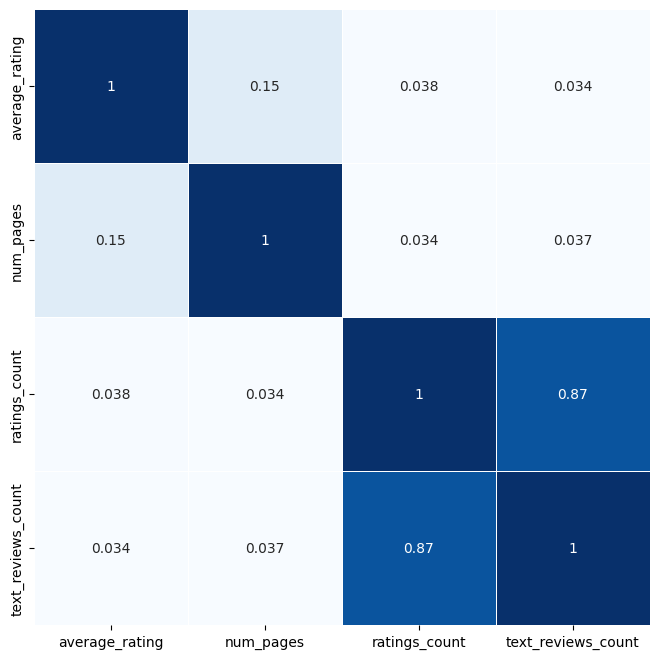

In [192]:
plt.figure(figsize=(8,8))
# cbar : colorbar
# square : each cell will be square shaped
sns.heatmap(df_numeric.corr(), cbar=False, square=True, annot=True, cmap='Blues', linewidths=0.5)

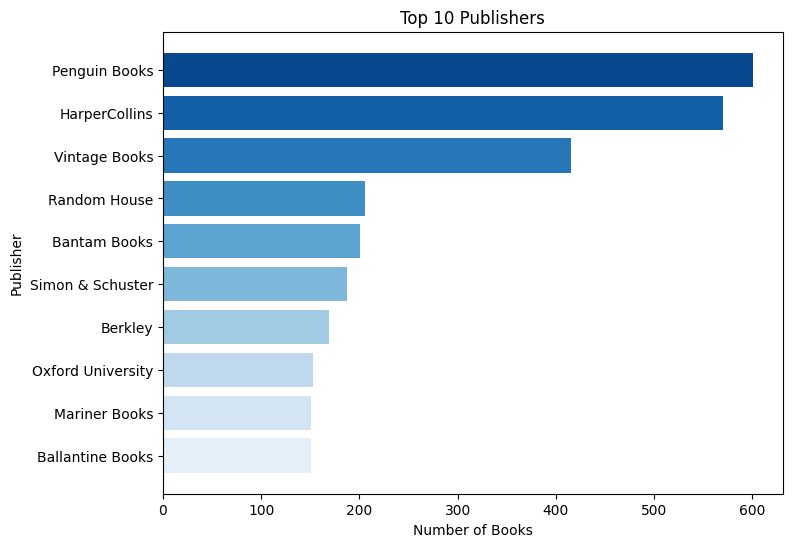

In [193]:
top_publishers = df_pub['publisher'].value_counts().sort_values(ascending=False)
top_publishers = top_publishers[:10]
top_publishers = top_publishers[::-1]

plt.figure(figsize=(8, 6))
palette = sns.color_palette("Blues", 10)
plt.barh(top_publishers.index, top_publishers.values, color=palette)
plt.title('Top 10 Publishers')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()

<Figure size 800x600 with 0 Axes>

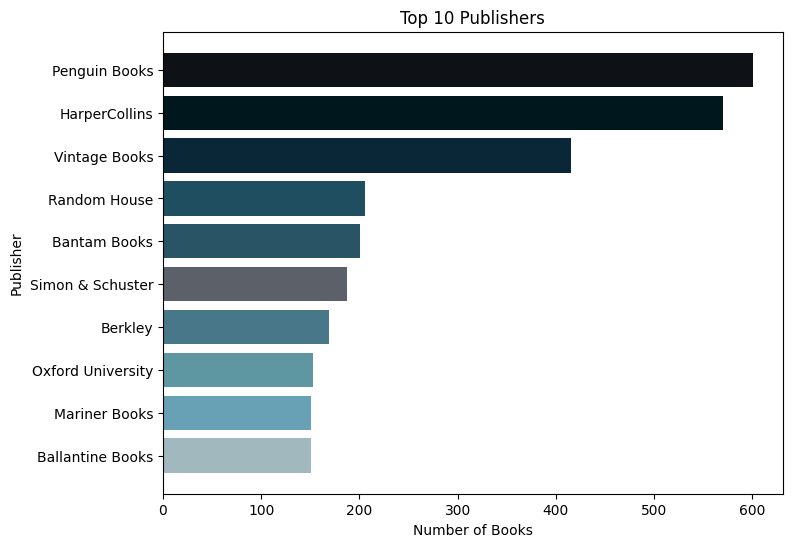

In [194]:
top_publishers = df_pub['publisher'].value_counts().sort_values(ascending=False)
top_publishers = top_publishers[:10]
top_publishers = top_publishers[::-1]

plt.figure(figsize=(8, 6))

#0e1115 #00171e #0a2738 #1f4e60 #295465 #5c6069 #477788 #5e96a2 #67a1b6 #a0b8be

# Define a custom color map with 10 colors
colors = ["#0e1115", "#00171e", "#0a2738", "#1f4e60", "#295465", "#5c6069", "#477788", "#5e96a2", "#67a1b6", "#a0b8be"]
colors = colors[::-1]
cmap = mcolors.LinearSegmentedColormap.from_list("mycmap", colors)

plt.figure(figsize=(8, 6))
plt.barh(top_publishers.index, top_publishers.values, color=cmap(np.linspace(0, 1, len(top_publishers))))
plt.title('Top 10 Publishers')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()